In [83]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [84]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

# RANDOM_SEED와 LABELS 설정
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [85]:
df = pd.read_csv("C:/creditcard.csv")

In [86]:
df.shape

(284807, 31)

In [87]:
df.isnull().values.any()

False

In [88]:
from sklearn.preprocessing import StandardScaler

df = df.drop(['Time'], axis=1)
df = df.drop(['Amount'], axis=1)
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape, normal.shape

((492, 29), (284315, 29))

In [89]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values

X_train.shape, X_test.shape

((227451, 28), (56962, 28))

In [90]:
input_dim = X_train.shape[1]


input_layer = Input(shape=(input_dim, ))

encoder = Dense(14, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(7, activation="relu")(encoder)
decoder = Dense(7, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28)]              0         
                                                                 
 dense_29 (Dense)            (None, 14)                406       
                                                                 
 dense_30 (Dense)            (None, 7)                 105       
                                                                 
 dense_31 (Dense)            (None, 7)                 56        
                                                                 
 dense_32 (Dense)            (None, 28)                224       
                                                                 
Total params: 791 (3.09 KB)
Trainable params: 791 (3.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
#nb_epoch = 100
nb_epoch = 15
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.pt",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/15
6398/6398 [==============================] - ETA: 0s - loss: 0.8210 - accuracy: 0.5844INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 38s 6ms/step - loss: 0.8210 - accuracy: 0.5844 - val_loss: 0.7512 - val_accuracy: 0.6437
Epoch 2/15
6396/6398 [============================>.] - ETA: 0s - loss: 0.7523 - accuracy: 0.6617INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 35s 6ms/step - loss: 0.7522 - accuracy: 0.6617 - val_loss: 0.7239 - val_accuracy: 0.6781
Epoch 3/15
6393/6398 [============================>.] - ETA: 0s - loss: 0.7358 - accuracy: 0.6858INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 31s 5ms/step - loss: 0.7357 - accuracy: 0.6858 - val_loss: 0.7172 - val_accuracy: 0.6920
Epoch 4/15
6398/6398 [==============================] - ETA: 0s - loss: 0.7296 - accuracy: 0.6940INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 30s 5ms/step - loss: 0.7296 - accuracy: 0.6940 - val_loss: 0.7123 - val_accuracy: 0.6952
Epoch 5/15
6386/6398 [============================>.] - ETA: 0s - loss: 0.7258 - accuracy: 0.6997INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 30s 5ms/step - loss: 0.7262 - accuracy: 0.6997 - val_loss: 0.7085 - val_accuracy: 0.7000
Epoch 6/15
6390/6398 [============================>.] - ETA: 0s - loss: 0.7237 - accuracy: 0.7030INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 30s 5ms/step - loss: 0.7235 - accuracy: 0.7030 - val_loss: 0.7080 - val_accuracy: 0.6970
Epoch 7/15
6387/6398 [============================>.] - ETA: 0s - loss: 0.7215 - accuracy: 0.7038INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 30s 5ms/step - loss: 0.7217 - accuracy: 0.7038 - val_loss: 0.7066 - val_accuracy: 0.7011
Epoch 8/15
6392/6398 [============================>.] - ETA: 0s - loss: 0.7206 - accuracy: 0.7040INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 30s 5ms/step - loss: 0.7205 - accuracy: 0.7040 - val_loss: 0.7043 - val_accuracy: 0.7064
Epoch 9/15
6394/6398 [============================>.] - ETA: 0s - loss: 0.7195 - accuracy: 0.7044INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 34s 5ms/step - loss: 0.7194 - accuracy: 0.7044 - val_loss: 0.7038 - val_accuracy: 0.6999
Epoch 10/15
6398/6398 [==============================] - ETA: 0s - loss: 0.7186 - accuracy: 0.7054INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 31s 5ms/step - loss: 0.7186 - accuracy: 0.7054 - val_loss: 0.7019 - val_accuracy: 0.7088
Epoch 11/15
6388/6398 [============================>.] - ETA: 0s - loss: 0.7177 - accuracy: 0.7064INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 30s 5ms/step - loss: 0.7176 - accuracy: 0.7064 - val_loss: 0.7018 - val_accuracy: 0.7032
Epoch 12/15
6391/6398 [============================>.] - ETA: 0s - loss: 0.7166 - accuracy: 0.7079INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 32s 5ms/step - loss: 0.7164 - accuracy: 0.7079 - val_loss: 0.7002 - val_accuracy: 0.7059
Epoch 13/15
6398/6398 [==============================] - 30s 5ms/step - loss: 0.7155 - accuracy: 0.7080 - val_loss: 0.7004 - val_accuracy: 0.6966
Epoch 14/15
6398/6398 [==============================] - 29s 4ms/step - loss: 0.7150 - accuracy: 0.7086 - val_loss: 0.7016 - val_accuracy: 0.6979
Epoch 15/15
6388/6398 [============================>.] - ETA: 0s - loss: 0.7147 - accuracy: 0.7085INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 31s 5ms/step - loss: 0.7145 - accuracy: 0.7085 - val_loss: 0.6990 - val_accuracy: 0.7104


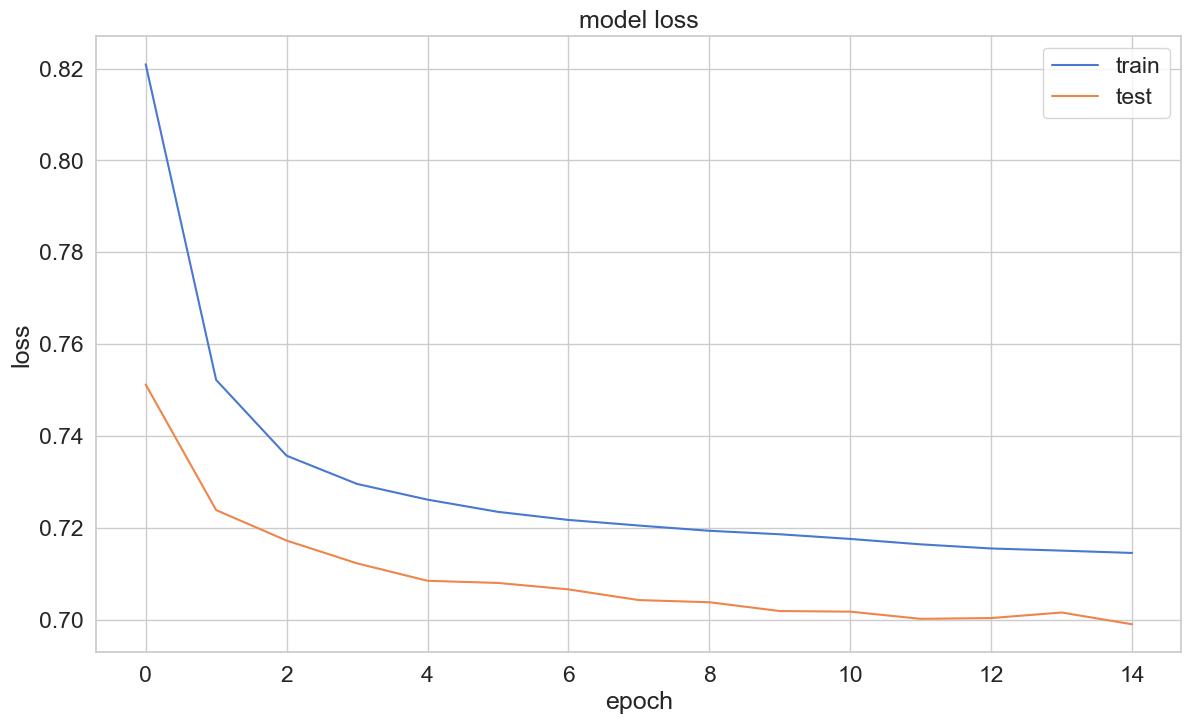

In [93]:
autoencoder = load_model('model.pt')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [94]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 [==============================] - 5s 3ms/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.750377,0.001720
std,3.566222,0.041443
min,0.045499,0.000000
25%,0.244466,0.000000
50%,0.405794,0.000000
75%,0.634174,0.000000
max,268.968262,1.000000


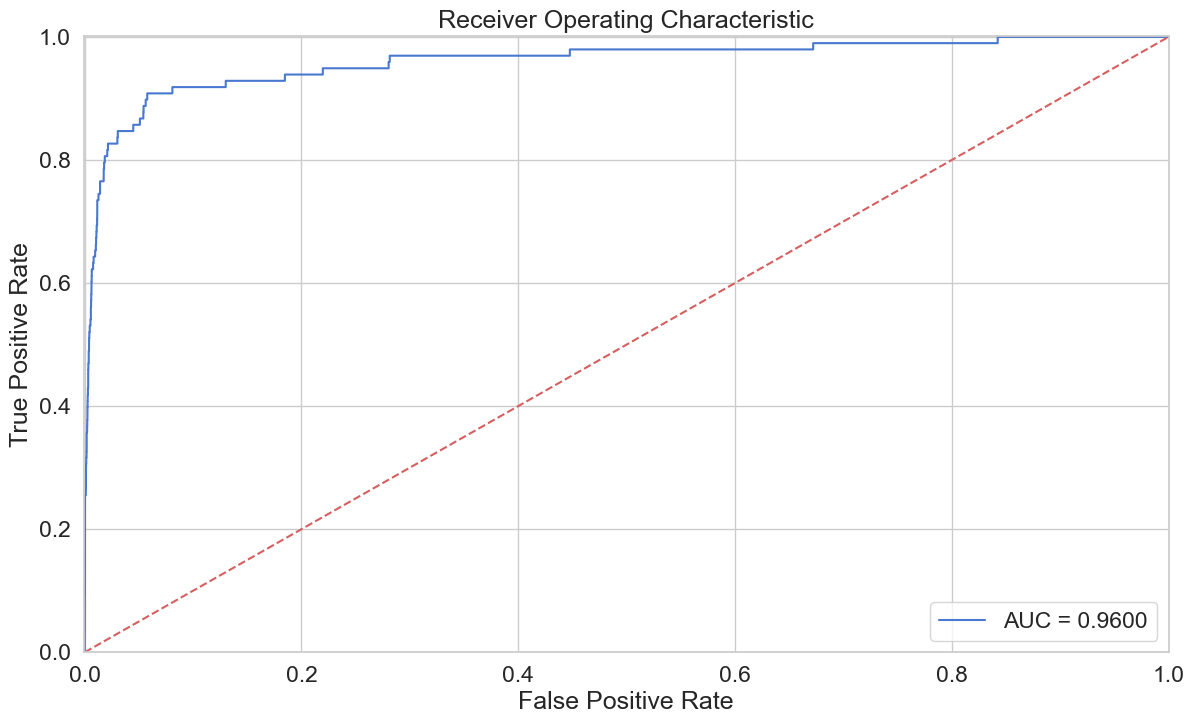

In [95]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

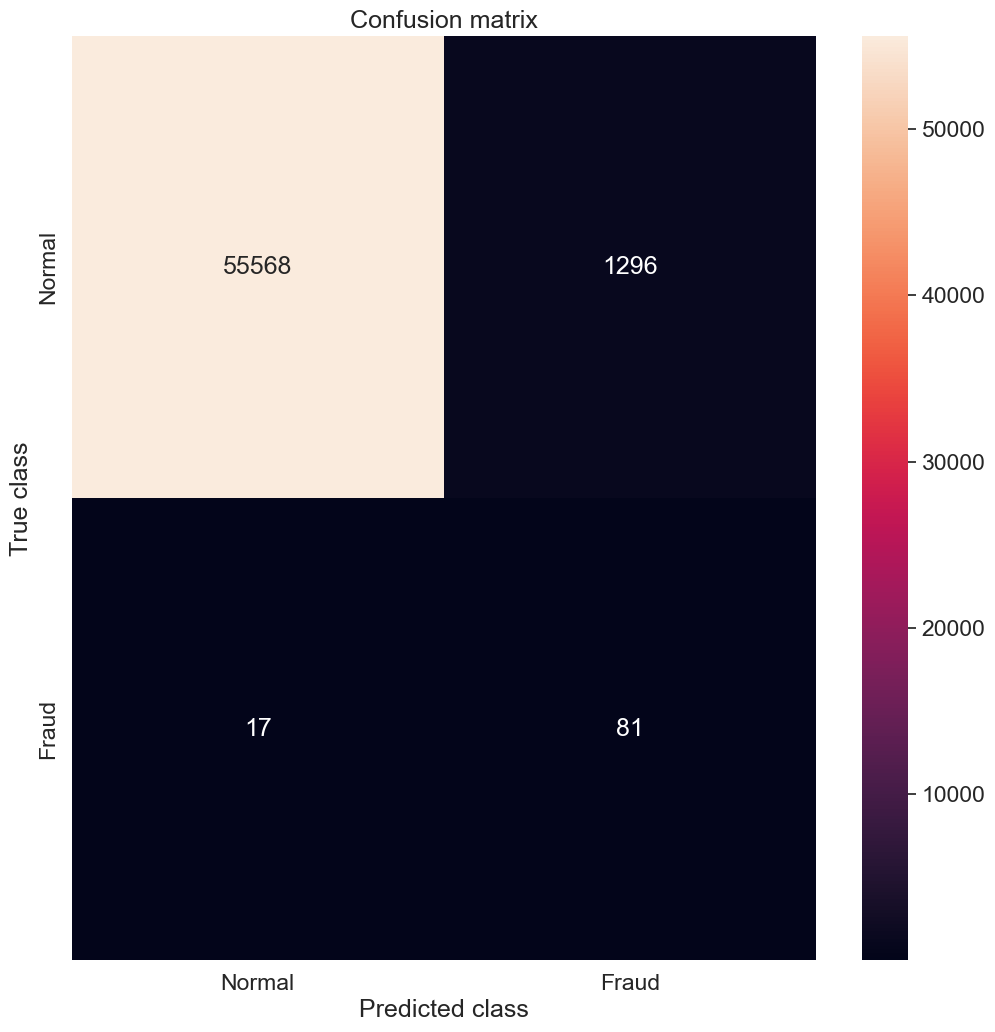

In [96]:
threshold = 2.9
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()